# Using ANN in Stock Price Prediction

Hello there!

This is my first attempt to implement Machine Learning/ Artifical Intelligence in Finance after I have found the concept so interesting! In this small programming exercise, I will be using Artificial Neural Network (ANN) to predict stock prices of some popular stocks.

In [1]:
#Implementing necessary modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


import yfinance as yf

In [2]:
#Initializing inputs
ticker = ['JPM']
prediction = 1
test_size = 0.2
start_date = '2011-01-01'
end_date = '2021-12-31'

After reading the article "Stock Closing Price Prediction using Machine Learning Techniques" (Mehar Vijha , Deeksha Chandolab, Vinay Anand Tikkiwalb, Arun Kumarc, 2020), I will try to mimic the algorithms to predict the stock price for the next day.

Input: 
1. High - Low
2. Open - Close
3. 7-Day Moving Average
4. 14-Day Moving Average
5. 21-Day Moving Average
6. 7-Day Standard Deviation

Output:
1. Closing Price in the next day

In [3]:
#Extract data from yfinance
df = yf.download(ticker ,start=start_date,end=end_date)
date_df = df.index

#Data Handling
df["H-L"] = df["High"] - df["Low"]
df["O-C"] = df["Open"] - df["Close"]
df["MA20"] = df["Adj Close"].rolling(window = 20).mean()
df["MA60"] = df["Adj Close"].rolling(window = 60).mean()
df["MA200"] = df["Adj Close"].rolling(window = 200).mean()
df["10D_STDEV"] = df["Adj Close"].rolling(window = 10).std()
df["Y"] = df["Adj Close"].shift(-prediction)

df.dropna(inplace = True)
df_forfitting = df.iloc[:len(df)-prediction]
df_forreallifeprediction = df.iloc[len(df)-prediction:]
print(df_forfitting)

df_final = df_forfitting.loc[:, ('H-L','O-C','MA20','MA60','MA200','10D_STDEV','Volume', 'Y')]
X = df_final.loc[:, df_final.columns != 'Y']
Y = df_final.loc[:, ('Y')]


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-10-17   31.639999   32.090000   30.969999   31.040001   23.418844   
2011-10-18   31.360001   33.419998   31.139999   32.869999   24.799534   
2011-10-19   32.770000   34.009998   32.029999   32.250000   24.331755   
2011-10-20   32.320000   33.189999   31.670000   33.130001   24.995686   
2011-10-21   33.480000   34.040001   33.009998   33.419998   25.214483   
...                ...         ...         ...         ...         ...   
2021-12-21  155.410004  157.179993  155.089996  156.089996  155.159943   
2021-12-22  155.750000  157.059998  155.240005  156.699997  155.766312   
2021-12-23  157.610001  159.119995  157.210007  157.259995  156.322968   
2021-12-27  157.600006  158.199997  156.339996  158.160004  157.217621   
2021-12-28  158.199997  160.149994  158.080

In [4]:
#Spliting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=test_size, shuffle = False)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape,' ',X_test.shape,' ')

(2053, 7)   (514, 7)  


In [5]:
#Initialising the ANN
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 7))
# model.add(Dense(units = 32, activation = 'relu'))
# model.add(Dense(units = 32, activation = 'relu'))
# model.add(Dense(units = 32, activation = 'relu'))
# model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, Y_train, batch_size = 16, epochs = 100)

Y_test_pred = model.predict(X_test)

Epoch 1/100
129/129 [==============================] - 0s 671us/step - loss: 4425.2515
Epoch 2/100
129/129 [==============================] - 0s 666us/step - loss: 3906.7761
Epoch 3/100
129/129 [==============================] - 0s 682us/step - loss: 3008.4976
Epoch 4/100
129/129 [==============================] - 0s 665us/step - loss: 1952.6113
Epoch 5/100
129/129 [==============================] - 0s 682us/step - loss: 1135.5764
Epoch 6/100
129/129 [==============================] - 0s 871us/step - loss: 688.4408
Epoch 7/100
129/129 [==============================] - 0s 849us/step - loss: 477.1060
Epoch 8/100
129/129 [==============================] - 0s 668us/step - loss: 371.0923
Epoch 9/100
129/129 [==============================] - 0s 655us/step - loss: 307.2779
Epoch 10/100
129/129 [==============================] - ETA: 0s - loss: 267.661 - 0s 647us/step - loss: 261.4600
Epoch 11/100
129/129 [==============================] - 0s 665us/step - loss: 225.6050
Epoch 12/100
129/129 

129/129 [==============================] - 0s 862us/step - loss: 4.2752
Epoch 97/100
129/129 [==============================] - 0s 798us/step - loss: 4.3241
Epoch 98/100
129/129 [==============================] - 0s 871us/step - loss: 4.2616
Epoch 99/100
129/129 [==============================] - 0s 825us/step - loss: 4.2240
Epoch 100/100
129/129 [==============================] - 0s 858us/step - loss: 4.2277


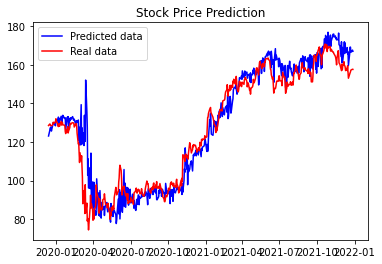

In [6]:
#Plot the graphs
plt.plot(Y_test.index, Y_test_pred, color = 'blue', label = 'Predicted data')
plt.plot(Y_test.index, Y_test, color = 'red', label = 'Real data')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [7]:
#Analyze the performance of the model

import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(Y_test_pred,Y_test))
print("RMSE=","{:.4}".format(rmse))

mape = abs(np.mean((Y_test.values - Y_test_pred.ravel())/Y_test.values))
print("MAPE=","{:.2%}".format(mape))


RMSE= 8.989
MAPE= 1.18%
